In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cumfreq

aspect_ratio = 16./9
BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'

seconds_per_sol = 88775.

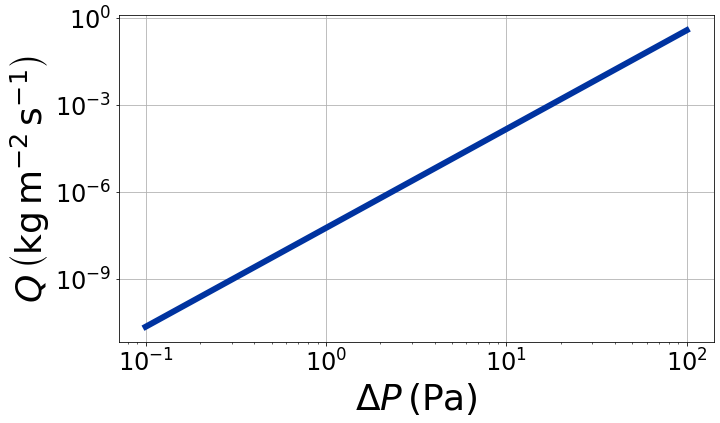

In [3]:
fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

Neakrase_exponent = 3.4
Neakrase_coefficient = 5.79e-8
Delta_Ps = 10.**(np.linspace(-1, 2))
Qs = Neakrase_coefficient*Delta_Ps**Neakrase_exponent

ax.loglog(Delta_Ps, Qs, lw=6, color=BoiseState_blue)

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\Delta P\, \\left({\\rm Pa}\\right)$", fontsize=36)
ax.set_ylabel("$Q\, \\left({\\rm kg\, m^{-2}\, s^{-1}}\\right)$", fontsize=36)

fig.savefig("Q_vs_Delta-P.png", dpi=500, bbox_inches="tight")

-2.1027890098110125 0.37896747625991956


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, '$\\log_{10} \\left( N \\right)$')

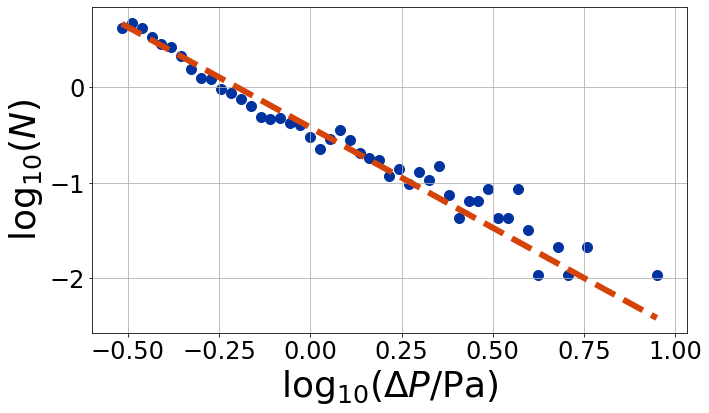

In [4]:
# 2020 Apr 23 - Analyzing population of dust devil pressure drops reported by Spiga
#   From github.com/aymeric-spiga/insight-atmosphere-nature-geoscience/blob/master/figure_vortices/alldrop_ordered.txt
filename = "alldrop_ordered.txt"

data = np.genfromtxt(filename, delimiter=" ; ", comments="#", usecols=[0], names=["DeltaP"])
hst, bin_edges = np.histogram(np.log10(-data["DeltaP"]), bins='auto', density=True)
log10_hst_err = np.sqrt(hst)/(hst*np.log(10.))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[0:-1])
ind = (bin_centers < 0.6) & (hst > 0.)
res = np.polyfit(bin_centers[ind], np.log10(hst[ind]), 1, w=1./log10_hst_err[ind], cov=True)

gamma = res[0][0]
coefficient = 10**res[0][1]
print(gamma, coefficient)
# print(np.sqrt(np.diag(res[1])))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

# ax.errorbar(bin_centers, np.log10(hst), yerr=log10_hst_err, marker='o', markersize=10, ls='', color=BoiseState_blue)
ax.scatter(bin_centers, np.log10(hst), marker='o', s=100, color=BoiseState_blue)
ax.plot(bin_centers, np.polyval(res[0], bin_centers), lw=6, color=BoiseState_orange, ls='--')

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$\\log_{10} \\left( N \\right)$", fontsize=36)

# ax.text(0.2, 2.25, "$N \\propto \\Delta P^{%4.3g\\pm%.0g}$" % (res[0][0], np.sqrt(np.diag(res[1]))[0]), fontsize=36)

Curiosity_fit:  [-3.11305144 -0.76242801]
Curiosity_fit_err:  [0.00681618 0.00122993]
Insight_fit:  [-1.82907246  0.19320096]
Insight_fit_err:  [0.002915   0.00057885]
Phoenix_fit:  [-2.32385837 -0.52560113]
Insight_fit_err:  [0.00971403 0.00171427]
Pathfinder_fit:  [-1.67161525 -0.12520046]
Pathfinder_fit_err:  [0.00416241 0.00081115]


Text(0, 0.5, '$\\log_{10} \\left( N \\right)$')

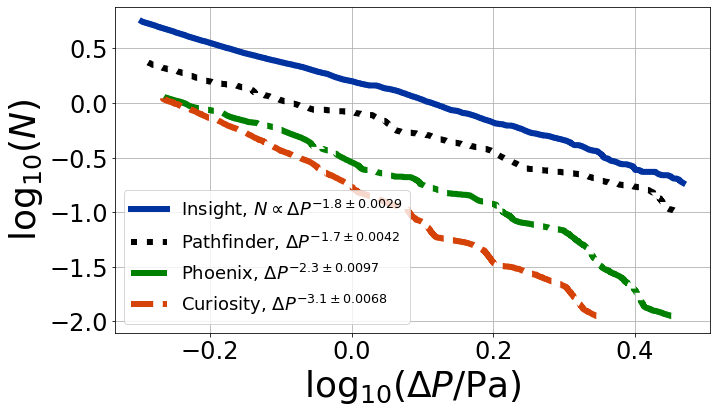

In [78]:
# 2020 Apr 25 - Analyzing population of dust devil pressure drops reported in Banfield, Spiga, et al. (2020)
#   after grabbing data from figure
Curiosity_filename = "41561_2020_534_Fig5_HTML_b_Curiosity.txt"
Insight_filename = "41561_2020_534_Fig5_HTML_b_Insight.txt"
Phoenix_filename = "41561_2020_534_Fig5_HTML_b_Phoenix.txt"
Pathfinder_filename = "41561_2020_534_Fig5_HTML_b_Pathfinder.txt"

Curiosity_data = np.genfromtxt(Curiosity_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Curiosity_err = np.sqrt(10.**Curiosity_data["logN"])/(10.**Curiosity_data["logN"]*np.log(10.))

Insight_data = np.genfromtxt(Insight_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Insight_err = np.sqrt(10.**Insight_data["logN"])/(10.**Insight_data["logN"]*np.log(10.))

Phoenix_data = np.genfromtxt(Phoenix_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Phoenix_err = np.sqrt(10.**Phoenix_data["logN"])/(10.**Phoenix_data["logN"]*np.log(10.))

Pathfinder_data = np.genfromtxt(Pathfinder_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Pathfinder_err = np.sqrt(10.**Pathfinder_data["logN"])/(10.**Pathfinder_data["logN"]*np.log(10.))

Curiosity_fit, Curiosity_cov = np.polyfit(Curiosity_data["logP"], Curiosity_data["logN"], 1, 
                                          w=1./Curiosity_err, cov=True)
print("Curiosity_fit: ", Curiosity_fit)
print("Curiosity_fit_err: ", np.diag(np.sqrt(Curiosity_cov)))

Insight_fit, Insight_cov = np.polyfit(Insight_data["logP"], Insight_data["logN"], 1, w=1./Insight_err, cov=True)
print("Insight_fit: ", Insight_fit)
print("Insight_fit_err: ", np.diag(np.sqrt(Insight_cov)))

Phoenix_fit, Phoenix_cov = np.polyfit(Phoenix_data["logP"], Phoenix_data["logN"], 1, w=1./Phoenix_err, cov=True)
print("Phoenix_fit: ", Phoenix_fit)
print("Insight_fit_err: ", np.diag(np.sqrt(Phoenix_cov)))

Pathfinder_fit, Pathfinder_cov = np.polyfit(Pathfinder_data["logP"], Pathfinder_data["logN"], 1, 
                                            w=1./Pathfinder_err, cov=True)
print("Pathfinder_fit: ", Pathfinder_fit)
print("Pathfinder_fit_err: ", np.diag(np.sqrt(Pathfinder_cov)))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(Insight_data["logP"], Insight_data["logN"], lw=6, color=BoiseState_blue, 
        label=("Insight, $N \\propto \\Delta P^{%.2g \\pm %.2g}$" % (Insight_fit[0], 
                                                                     np.diag(np.sqrt(Insight_cov))[0])))
ax.plot(Pathfinder_data["logP"], Pathfinder_data["logN"], lw=6, color="black", ls=':', 
        label=("Pathfinder, $\\Delta P^{%.2g \\pm %.2g}$" % (Pathfinder_fit[0], 
                                                             np.diag(np.sqrt(Pathfinder_cov))[0])))
ax.plot(Phoenix_data["logP"], Phoenix_data["logN"], lw=6, color="green", ls='-.', 
        label=("Phoenix, $\\Delta P^{%.2g \\pm %.2g}$" % (Phoenix_fit[0], 
                                                np.diag(np.sqrt(Phoenix_cov))[0])))
ax.plot(Curiosity_data["logP"], Curiosity_data["logN"], lw=6, color=BoiseState_orange, ls='--', 
        label=("Curiosity, $\\Delta P^{%.2g \\pm %.2g}$" % (Curiosity_fit[0], 
                                                  np.diag(np.sqrt(Curiosity_cov))[0])))
ax.grid(True)
ax.legend(loc='best', fontsize=18)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$\\log_{10} \\left( N \\right)$", fontsize=36)

Text(0, 0.5, '# of Sols')

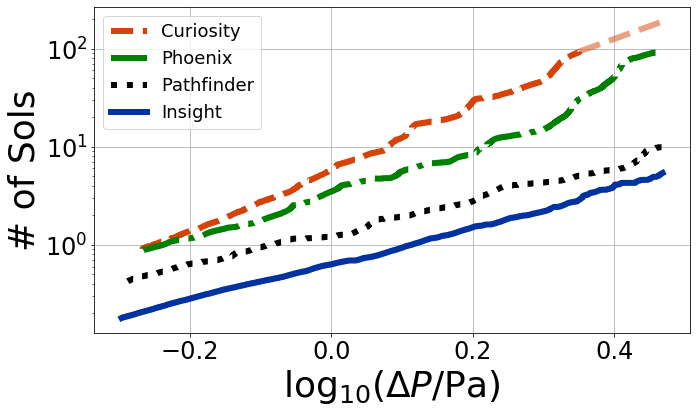

In [41]:
# 2020 Apr 25 - Analyzing population of dust devil pressure drops reported in Banfield, Spiga, et al. (2020)
#   after grabbing data from figure
Curiosity_filename = "41561_2020_534_Fig5_HTML_b_Curiosity.txt"
Insight_filename = "41561_2020_534_Fig5_HTML_b_Insight.txt"
Phoenix_filename = "41561_2020_534_Fig5_HTML_b_Phoenix.txt"
Pathfinder_filename = "41561_2020_534_Fig5_HTML_b_Pathfinder.txt"

Curiosity_data = np.genfromtxt(Curiosity_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Insight_data = np.genfromtxt(Insight_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Phoenix_data = np.genfromtxt(Phoenix_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Pathfinder_data = np.genfromtxt(Pathfinder_filename, delimiter=", ", comments="#", names=["logP", "logN"])

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.semilogy(Curiosity_data["logP"], 1./10**Curiosity_data["logN"], lw=6, color=BoiseState_orange, ls='--', 
        label="Curiosity")
ax.semilogy([Curiosity_data["logP"][-1], Insight_data["logP"][-1]], 
            [1./10**Curiosity_data["logN"][-1], 1./10**(np.polyval(Curiosity_fit, Insight_data["logP"][-1]))], 
           lw=6, color=BoiseState_orange, ls='--', alpha=0.5)

ax.semilogy(Phoenix_data["logP"], 1./10**Phoenix_data["logN"], lw=6, color="green", ls='-.', 
        label="Phoenix")

ax.semilogy(Pathfinder_data["logP"], 1./10**Pathfinder_data["logN"], lw=6, color="black", ls=':', 
        label="Pathfinder")

ax.semilogy(Insight_data["logP"], 1./10**Insight_data["logN"], lw=6, color=BoiseState_blue, label="Insight")

ax.grid(True)
ax.legend(loc='best', fontsize=18)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("# of Sols", fontsize=36)

#### The population-weighted dust flux

The histogram as a function of vortex $\Delta P$ is given by $N(\Delta P) = k \Delta P^{-\gamma}$.

If the dust flux from a single dust devil with a given $\Delta P$-value is given by $Q(\Delta P) = h \Delta P^{\delta}$ with $h = 5.79\times10^{-8}\, {\rm kg/m^2/s}$, then the population-weighted average flux is 
$$
\langle Q \rangle = \int_{\Delta P_{\rm min}}^{\Delta P_{\rm max}} Q(\Delta P)\ N(\Delta P)\ d\Delta P \\
= h\ k \int_{\Delta P_{\rm min}}^{\Delta P_{\rm max}} \Delta P^{\delta -\gamma}\ d\Delta P\\
= \dfrac{h\ k}{1 + \delta - \gamma} \left( \Delta P_{\rm max}^{1 + \delta - \gamma} - \Delta P_{\rm min}^{1 + \delta - \gamma} \right).
$$

In [46]:
def integrated_flux(gamma, delta, mx, mn, k=Insight_fit[1], h=5.79e-8):
    return h*k/(1. + delta - gamma)*(mx**(1. + delta - gamma) - mn**(1. + delta - gamma))

In [47]:
print(integrated_flux(2., 3.4, 10., 9.))
print(integrated_flux(2., 3.4, 10., 1.))

2.6084934364054115e-07
1.1628421557536141e-06


Text(0, 0.5, '$\\langle Q \\rangle\\, \\left( {\\rm g/m^2/sol} \\right)$')

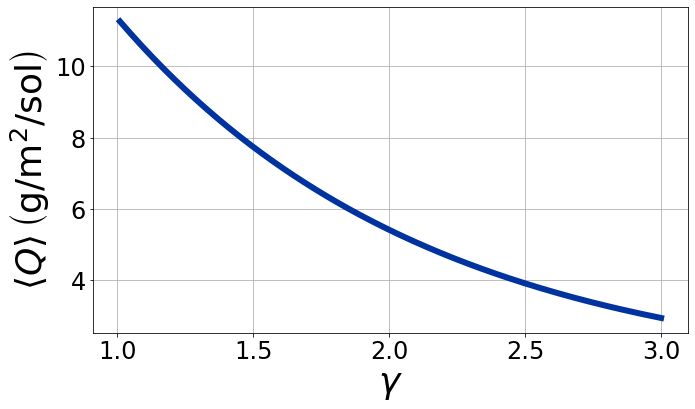

In [57]:
# 2020 Apr 24 - Calculate population-weighted dust flux
min_DeltaP = np.min(10**Insight_data["logP"])
max_DeltaP = np.max(10**Insight_data["logP"])

# gamma = res[0][0]
gammas = np.arange(1.01, 3.01, 0.01)
delta = 3.4

Qs = integrated_flux(gammas, delta, max_DeltaP, min_DeltaP)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(gammas, Qs*seconds_per_sol*1000., lw=6, color=BoiseState_blue)

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\gamma$", fontsize=36)
ax.set_ylabel("$\\langle Q \\rangle\, \\left( {\\rm g/m^2/sol} \\right)$", fontsize=36)

2.9390028011711458


Text(0, 0.5, '$Q/Q_{\\rm tot}$')

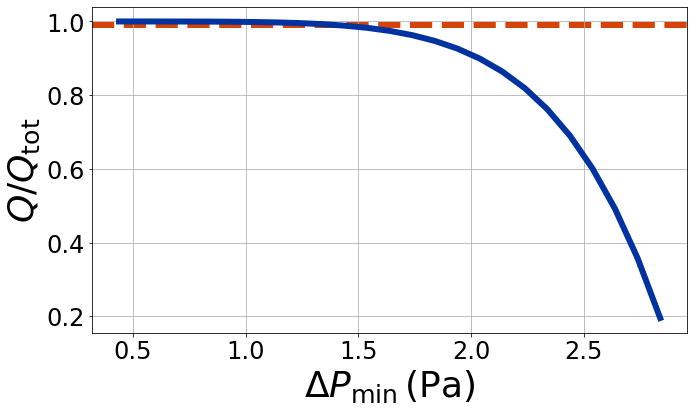

In [63]:
# 2020 Apr 24 - Calculate population-weighted dust flux
min_DeltaP = np.min(10**Insight_data["logP"])
max_DeltaP = np.max(10**Insight_data["logP"])
delta = 3.4

# Calculate the actual best-estimate average dust flux
best_est_Q = integrated_flux(Insight_fit[0], delta, max_DeltaP, min_DeltaP)

# Now calculate how the dust flux estimate depends on the max Delta P
min_DeltaPs = max_DeltaP - np.arange(0.1, (max_DeltaP - min_DeltaP) + 0.1, 0.1)
print(max_DeltaP)
Qs = integrated_flux(Insight_fit[0], delta, max_DeltaP, min_DeltaPs)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(min_DeltaPs, Qs/best_est_Q, lw=6, color=BoiseState_blue)
ax.axhline(0.99, zorder=-1, color=BoiseState_orange, lw=6, ls='--')

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\Delta P_{\\rm min}\, \\left( {\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$Q/Q_{\\rm tot}$", fontsize=36)